In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import sqlite3
import seaborn as sns

sns.set(style='white', palette="Set2", color_codes=False)
sns.set_style("ticks")

%matplotlib inline

In [2]:
def get_dataframes(query, databases):
    dataframes = []
    for database in databases:
        db = sqlite3.connect(database)
        dataframes += [pd.read_sql_query(query, db)]
    return pd.concat(dataframes)

In [3]:
query = 'select executor, returned, start_submit, tag from tasks where tag != "noop"'
databases = [
             'data/xtract-data.db', 'data/crystallography-data.db', 'data/mnist-data.db', 'data/xpcs-data.db'
]
tasks = get_dataframes(query, databases)

In [4]:
tasks['completion_time'] = (tasks['returned'] - tasks['start_submit'])
# NOTE multiplying by 100 and not 1000 b/c off by factor of 10. 
tasks.head()
tasks['batch_size'] = tasks.tag.str.extract('(\d+)')
tasks['task_time'] = tasks.completion_time / tasks.batch_size.astype(int)

# print(tasks)

for index, row in tasks.iterrows():

    if row["completion_time"] < 0: 
        print("ERROR")
#     print(row['completion_time'], row['tag'], row['batch_size'], row['task_time'])

In [5]:
tags = tasks["tag"].unique()
tags

array(['run_20k_file_1', 'run_20k_file_2', 'bash_dials_1', 'bash_dials_5',
       'bash_dials_10', 'bash_dials_25', 'bash_dials_50',
       'bash_dials_100', 'run_mnist_predict_1', 'bash_corr_1'],
      dtype=object)

In [6]:
latency_df = tasks[['tag', 'completion_time']]
latency_df["log_completion_time"] = np.log10(latency_df["completion_time"])
# for index, row in latency_df.iterrows():
#     if row["completion_time"] < 0: 
#         print("ERROR")
#     print(index, row['completion_time'], row['tag'])

/home/skluzacek/.miniconda3/envs/funcx/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    -0.158049
1    -0.155651
2    -0.107262
3    -0.148296
4    -0.163137
5    -0.151947
6    -0.156847
7    -0.167119
8    -0.158669
9    -0.160016
10   -0.163094
11   -0.163301
12   -0.161289
13   -0.147057
14   -0.158274
15   -0.162037
16   -0.162159
17   -0.160740
18   -0.164362
19   -0.161881
20   -0.160871
21   -0.156424
22   -0.151910
23   -0.164457
24   -0.158798
25   -0.165503
26   -0.127775
27   -0.164498
28   -0.156996
29   -0.163487
        ...   
70   -0.161734
71   -0.160956
72   -0.162772
73   -0.161497
74   -0.143824
75   -0.155964
76   -0.160552
77   -0.158831
78   -0.165782
79   -0.163247
80   -0.157741
81   -0.162410
82   -0.156241
83   -0.165530
84   -0.158919
85   -0.156167
86   -0.158693
87   -0.159467
88   -0.159737
89   -0.160915
90   -0.161581
91   -0.163672
92   -0.160884
93   -0.164953
94   -0.158452
95   -0.157326
96   -0.158584
97   -0.164836
98   -0.161473
99   -0.160678
Name: log_completion_time, Length: 100, dtype: float64
0.24457622428981504


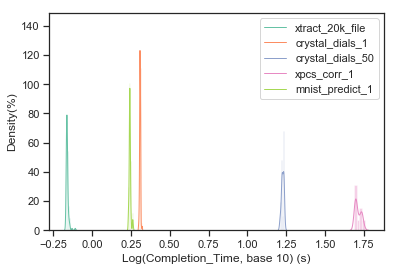

In [7]:
# print(latency_df)

# latency_df["completion_time"] = np.log(latency_df["completion_time"])

file_20k_1 = latency_df.loc[(latency_df.tag == "run_20k_file_1")]
file_20k_1 = file_20k_1["log_completion_time"]
print(file_20k_1)

bash_dials_1 = latency_df.loc[(latency_df.tag == "bash_dials_1")]
bash_dials_1 = bash_dials_1["log_completion_time"]

bash_dials_50 = latency_df.loc[(latency_df.tag == "bash_dials_50")]
bash_dials_50 = bash_dials_50["log_completion_time"]

bash_corr_1 = latency_df.loc[(latency_df.tag == "bash_corr_1")]
bash_corr_1 = bash_corr_1["log_completion_time"]

mnist_predict_1 = latency_df.loc[(latency_df.tag == "run_mnist_predict_1")]
mnist_predict_1 = mnist_predict_1["log_completion_time"]
print(np.mean(mnist_predict_1))

ax1 = sns.distplot(file_20k_1, kde_kws={"lw": 1, "label": "xtract_20k_file"}, norm_hist=True)
ax2 = sns.distplot(bash_dials_1, kde_kws={"lw": 1, "label": "crystal_dials_1"}, norm_hist=True)
ax3 = sns.distplot(bash_dials_50, kde_kws={"lw": 1, "label": "crystal_dials_50"}, norm_hist=True)
ax4 = sns.distplot(bash_corr_1, kde_kws={"lw": 1, "label": "xpcs_corr_1"}, norm_hist=True)
ax5 = sns.distplot(mnist_predict_1, kde_kws={"lw": 1, "label": "mnist_predict_1"}, norm_hist=True)
ax1.set(xlabel = "Log(Completion_Time, base 10) (s)", ylabel="Density(%)")


ax1.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
# plt.show()
plt.savefig('use-cases.jpg', dpi=1000)

# run_mnist_predict_1

In [8]:
# bash_dials_25 = latency_df.loc[(latency_df.tag == "bash_dials_25")]
# bash_dials_50 = latency_df.loc[(latency_df.tag == "bash_dials_50")]


# print(np.mean(file_20k_1["completion_time"]))
